# Random Forest: A Complete Guide

In this notebook, we will implement a Random Forest algorithm and explain each step in detail.

---

## Introduction

**Random Forest** is an ensemble learning method that operates by constructing multiple decision trees and combining their predictions (by averaging for regression or majority voting for classification). It is robust against overfitting and performs well even when there is no strong relationship between the features and the target.

### Key Concepts:
- **Ensemble Learning**: Combining the predictions of several models to improve overall performance.
- **Decision Trees**: A tree-like model where each internal node represents a "decision" on a feature, each branch represents an outcome, and each leaf represents a class label or a value.
- **Bagging**: Random Forests apply bootstrap aggregation (bagging), meaning each tree is trained on a random sample of the training data.
- **Feature Randomness**: Each tree is built on a random subset of features to increase diversity among the trees.

---

## 1. Importing Required Libraries

We'll start by importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay

## 2. Creating a Synthetic Dataset 

* We'll generate a simple dataset for binary classification 

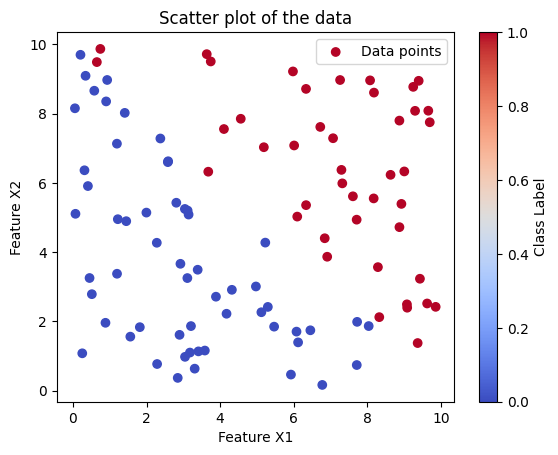

In [2]:
# Generate synthetic data for binary classification
np.random.seed(42)
X = np.random.rand(100, 2) * 10  # 100 points, 2 features between 0 and 10
y = (X[:, 0] + X[:, 1] > 10).astype(int)  # Class 1 if sum of features > 10, otherwise class 0

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", label="Data points")
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.title("Scatter plot of the data")
plt.colorbar(label='Class Label')
plt.legend()
plt.show()

## 3. Splitting Data into Training and Testing Sets

* Next, we split the data into training and testing sets.

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Training the Random Forest Classifier


* We will create and train a Random Forest classifier with 100 trees (n_estimators=100).

In [4]:
# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 5. Making Predictions 

* Next, we use the trained model to make predictions on the test set.

In [5]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

## 6. Evaluating the Model 

### 6.1 Accuracy Score


* We start by calculating the accuracy of the model.

In [6]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


### 6.2 Confusion Matrix and Classification Report


* To get a detailed performance breakdown, we will generate the confusion matrix and classification report.

<Figure size 800x600 with 0 Axes>

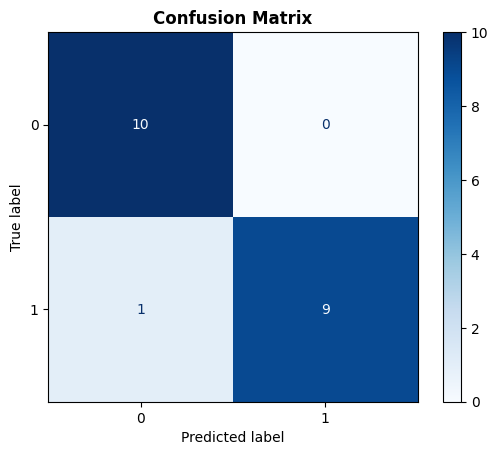

Classification Report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [11]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.title('Confusion Matrix', fontweight='bold')
plt.show()

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print()
print(class_report)

### 6.3 ROC Curve and AUC

* We will also compute and plot the ROC curve, and calculate the AUC score.

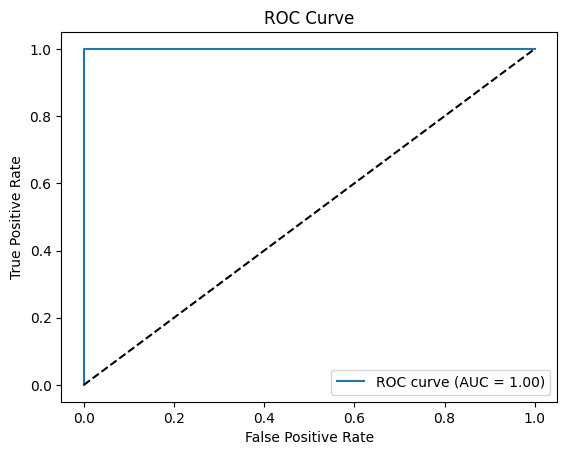

In [8]:
# Predict probabilities for ROC curve
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## 7. Feature Importance 

* One of the key strengths of Random Forest is its ability to measure feature importance. Let’s visualize the importance of each feature.

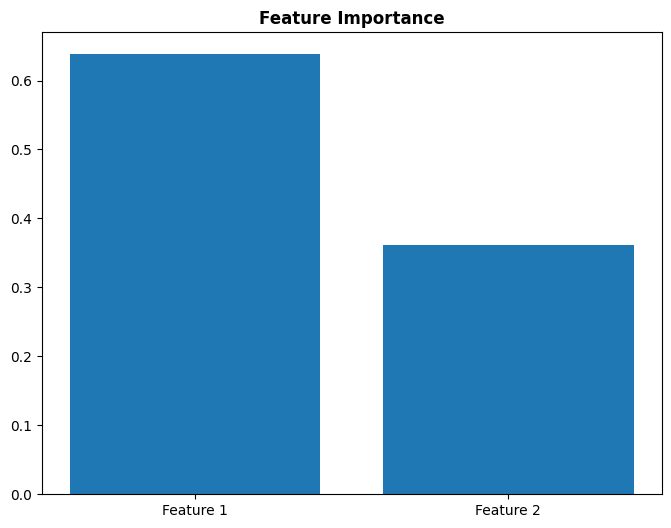

In [9]:
# Get feature importances
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(8, 6))
plt.title("Feature Importance", fontweight='bold')
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [f"Feature {i+1}" for i in indices])
plt.show()

## 8. Visualizing Decision Boundaries

* Let’s visualize the decision boundary created by the Random Forest classifier.

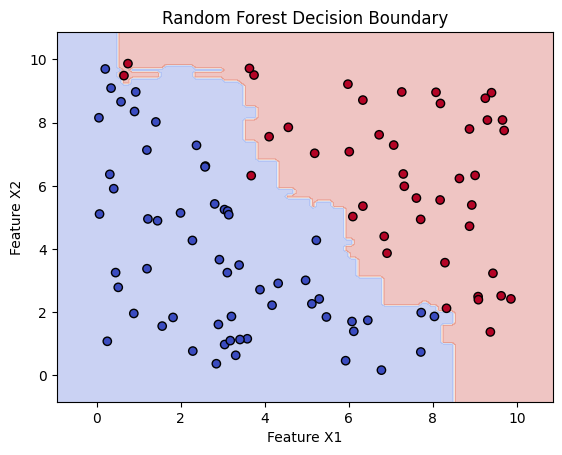

In [10]:
# Create a grid of values for X1 and X2 to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict class labels for the grid
Z = rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap="coolwarm")
plt.xlabel("Feature X1")
plt.ylabel("Feature X2")
plt.title("Random Forest Decision Boundary")
plt.show()

## 9. Conclusion 

In this notebook, we implemented a Random Forest classifier and explored various steps:

	•	Data generation and visualization.
	•	Model training and prediction.
	•	Model evaluation using accuracy, confusion matrix, and ROC curve.
	•	Visualizing feature importance and decision boundaries.

**Random Forest is a powerful and flexible model that performs well on a variety of tasks. It’s robust against overfitting and provides useful insights into feature importance.**